# Conectare

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf
import PIL
import PIL.Image

# Citire

In [ ]:
images_path = '/content/gdrive/MyDrive/licenta/dataset/poze/original'
train_file_path = '/content/gdrive/MyDrive/licenta/dataset/train.txt'
val_file_path = '/content/gdrive/MyDrive/licenta/dataset/validare.txt'
test_file_path = '/content/gdrive/MyDrive/licenta/dataset/test.txt'

In [ ]:
def getData(filname):
  files = {'name':[],'label':[]}
  for line in open(filname):
    row = line.split(' ')
    files['name'].append(row[0])
    files['label'].append(int(row[1]))

  return files

In [ ]:
train_files = getData(train_file_path)
test_files = getData(test_file_path)
val_files = getData(val_file_path)
train_files['name'][0], train_files['label'][0]

('train_00001.jpg', 5)

In [ ]:
images_name = os.listdir(images_path)
images_name[:2]

['test_2067.jpg', 'test_2068.jpg']

In [ ]:
len(images_name), len(set(images_name))

(15339, 15339)

# Creare dataframe

In [ ]:
df_train = pd.read_csv(train_file_path, sep=' ', names=['img','label'])
df_test = pd.read_csv(test_file_path, sep=' ', names=['img','label'])
df_val = pd.read_csv(val_file_path, sep=' ', names=['img','label'])

df_train.head()

,img,label
0,train_00001.jpg,5
1,train_00002.jpg,5
2,train_00003.jpg,4
3,train_00004.jpg,4
4,train_00005.jpg,5


In [ ]:
len(df_train), len(df_test), len(df_val), len(set(df_train['img']))+len(set(df_test['img']))+len(set(df_val['img']))

(10335, 3068, 1707, 15110)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F60DD887850> <class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F60E014BE80> <class 'PIL.Image.Image'>


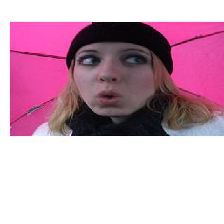

In [ ]:
image1 = tf.keras.utils.load_img(images_path+"/"+images_name[0], target_size=(224,224))
print(image1, type(image1))

image2 = tf.keras.utils.load_img(images_path+"/"+images_name[1000], target_size=(224,224))
print(image2, type(image2))
image1

In [ ]:
df_train['label'].unique(),df_val['label'].unique(),df_test['label'].unique()

(array([5, 4, 1, 6, 2, 3, 7]),
 array([6, 4, 5, 3, 1, 2, 7]),
 array([5, 1, 4, 3, 6, 2, 7]))

# Crearea structurii de fisiere si salvarea imaginilor in functie de eticheta

Aceste functii sunt rulate o singura data!

Structura:

ROOT: /content/gdrive/MyDrive/licenta/dataset/poze
 - train
    * class_1
       
        - > root/class_1/xxx.png
        - > root/class_1/yyy.png
    * class_2
    * class_3
    * class_4
    * class_5
    * class_6
    * class_7
 - test
    * class_1
        - > root/class_1/zzz.png
        - > root/class_1/vvv.png
    * class_2
    * class_3
    * class_4
    * class_5
    * class_6
    * class_7

 - validation
    * class_1
        - > root/class_1/rrr.png
        - > root/class_1/ttt.png
    * class_2
    * class_3
    * class_4
    * class_5
    * class_6
    * class_7


In [ ]:
import shutil
old_path = images_path

In [ ]:
new_path_train = '/content/gdrive/MyDrive/licenta/dataset/poze/train'
for index, row in df_train.iterrows():
  img = row['img']
  img_class = str(row['label'])
  shutil.copyfile(old_path+'/'+img, new_path_train+'/'+img_class+'/'+img)

In [ ]:
new_path_test = '/content/gdrive/MyDrive/licenta/dataset/poze/test'
for index, row in df_test.iterrows():
  img = row['img']
  img_class = str(row['label'])
  shutil.copyfile(old_path+'/'+img, new_path_test+'/'+img_class+'/'+img)

In [ ]:
new_path_val = '/content/gdrive/MyDrive/licenta/dataset/poze/val'
for index, row in df_val.iterrows():
  img = row['img']
  img_class = str(row['label'])
  shutil.copyfile(old_path+'/'+img, new_path_val+'/'+img_class+'/'+img)

# Creare Generator pentru Augumentarea setului de date

In [ ]:
train_dir ='/content/gdrive/MyDrive/licenta/dataset/poze/train'
test_dir='/content/gdrive/MyDrive/licenta/dataset/poze/test'
val_dir='/content/gdrive/MyDrive/licenta/dataset/poze/val'
batch_size=8

In [ ]:
import pathlib
train_dir_posix = pathlib.Path(train_dir)
test_dir_posix = pathlib.Path(test_dir)
val_dir_posix = pathlib.Path(val_dir)

image_count_test = len(list(test_dir_posix.glob('*/*.jpg')))
print(image_count_test)
image_count_train = len(list(train_dir_posix.glob('*/*.jpg')))
print(image_count_train)
image_count_val = len(list(val_dir_posix.glob('*/*.jpg')))
print(image_count_val)

3068
10335
1707


In [ ]:
f = []
for filename in os.listdir(test_dir+'/7'):
    f.append(filename)
len(f), len(set(f))

(680, 680)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_height = 224
img_width = 224
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.3,
                             zoom_range=0.2,
                             horizontal_flip=True)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              color_mode="rgb",
                                              class_mode='categorical')

Found 10335 images belonging to 7 classes.


In [ ]:
test_generator = datagen.flow_from_directory(test_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              color_mode="rgb",
                                              class_mode='categorical')

Found 3068 images belonging to 7 classes.


In [ ]:
val_generator = datagen.flow_from_directory(val_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              color_mode="rgb",
                                              class_mode='categorical')

Found 1707 images belonging to 7 classes.


# Creare  Dataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  # label_mode='categorical',
  # labels=df_train['label'].to_numpy().tolist(),
  image_size=(img_height, img_width),
  color_mode="rgb",
  batch_size=batch_size)

Found 10335 files belonging to 7 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir_posix,
  # label_mode='categorical',
  # labels=df_val['label'].to_numpy().tolist(),
  image_size=(img_height, img_width),
  color_mode="rgb",
  batch_size=batch_size)

Found 1707 files belonging to 7 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  # label_mode='categorical',
  # labels=df_test['label'].to_numpy().tolist(),
  image_size=(img_height, img_width),
  color_mode="rgb",
  batch_size=batch_size)

Found 3068 files belonging to 7 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4', '5', '6', '7']


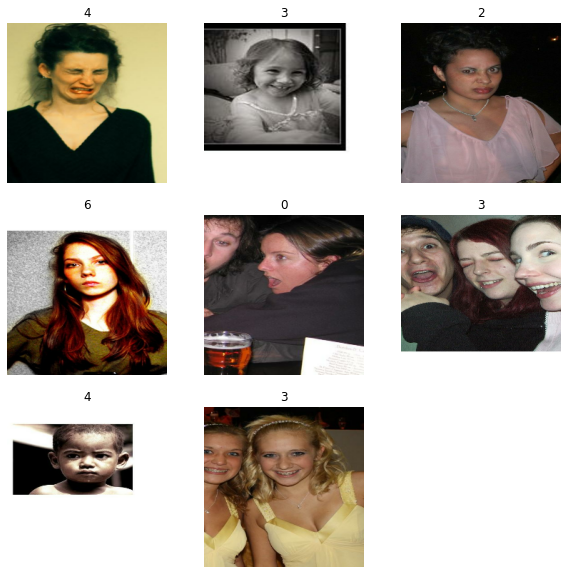

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(str(np.argmax(labels[i], axis=0)))
    plt.title(str(np.array(labels[i])))
    plt.axis("off")
  break